In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
import joblib

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
train_df = pd.read_csv('../03_Data_for_Modeling/train_xgboost_new_time_window.csv')
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
X_train = train_df.drop(columns=['time_window'])
y_train = train_df['time_window']

valid_df = pd.read_csv('../03_Data_for_Modeling/val_xgboost_new_time_window.csv')
valid_df = valid_df.sample(frac=1, random_state=42).reset_index(drop=True)
X_valid = valid_df.drop(columns=['time_window'])
y_valid = valid_df['time_window']

/home/jiax1/.local/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.37979	validation_0-merror:0.58773	validation_1-mlogloss:1.38181	validation_1-merror:0.63117
[1]	validation_0-mlogloss:1.37391	validation_0-merror:0.57527	validation_1-mlogloss:1.37763	validation_1-merror:0.61976
[2]	validation_0-mlogloss:1.36703	validation_0-merror:0.57175	validation_1-mlogloss:1.37338	validation_1-merror:0.62354
[3]	validation_0-mlogloss:1.35960	validation_0-merror:0.57082	validation_1-mlogloss:1.36880	validation_1-merror:0.62347
[4]	validation_0-mlogloss:1.35302	validation_0-merror:0.57128	validation_1-mlogloss:1.36447	validation_1-merror:0.62363
[5]	validation_0-mlogloss:1.34779	validation_0-merror:0.56953	validation_1-mlogloss:1.36055	validation_1-merror:0.62022
[6]	validation_0-mlogloss:1.34312	validation_0-merror:0.56874	validation_1-mlogloss:1.35754	validation_1-merror:0.61875
[7]	validation_0-mlogloss:1.33850	validation_0-merror:0.56908	validation_1-mlogloss:1.35415	validation_1-merror:0.61870
[8]	validation_0-mlogloss:1.33416	valida

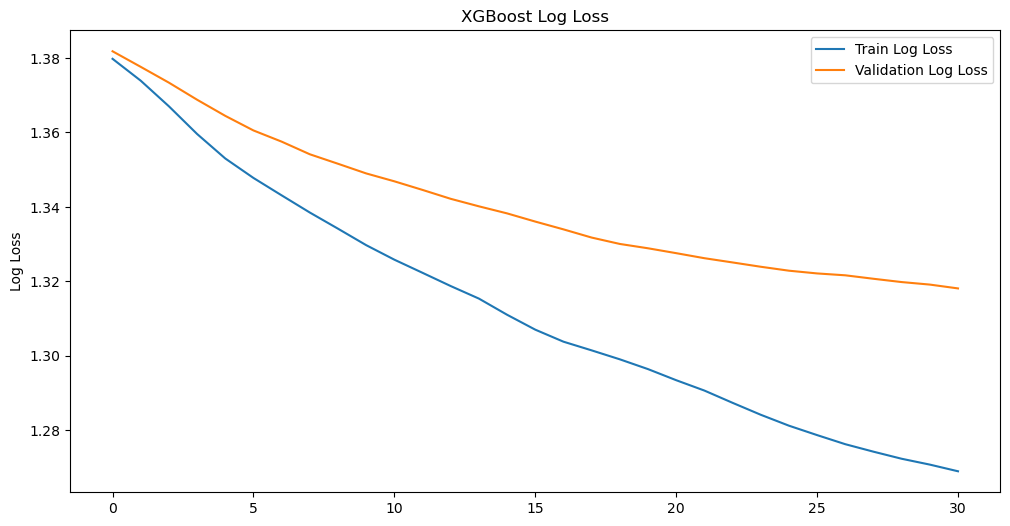

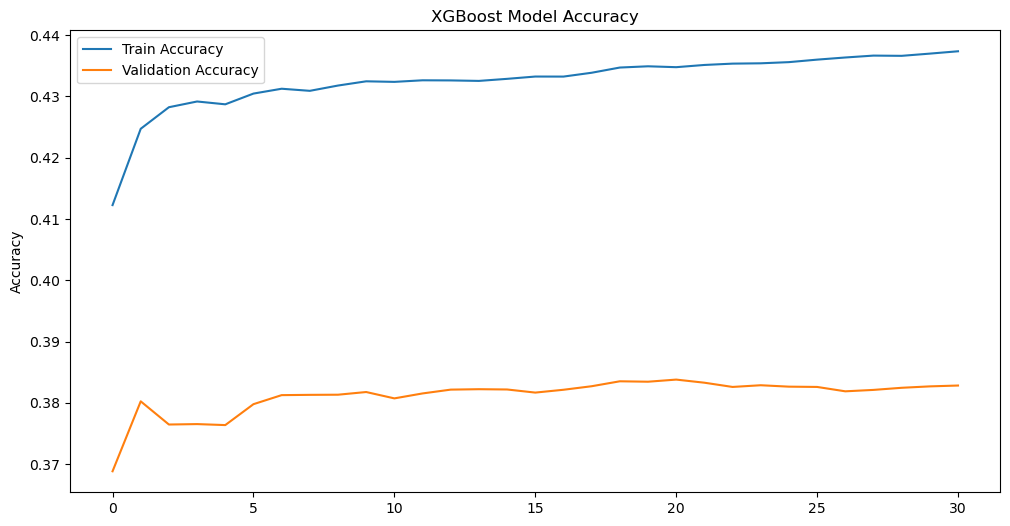

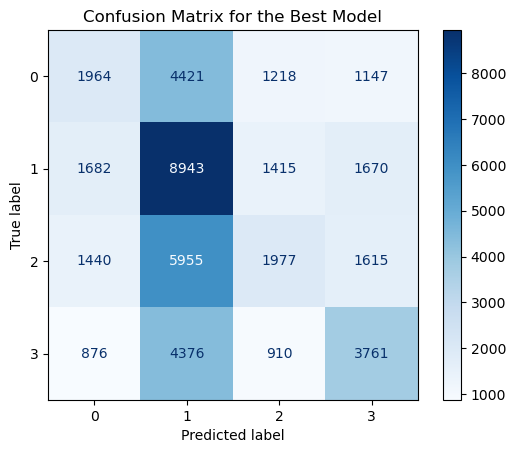

In [6]:
model = XGBClassifier(
    subsample=0.9,
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    colsample_bytree=0.6,
    objective='multi:softmax',
    num_class=4,
    eval_metric=["mlogloss", "merror"]
)

# Fit the model on the training data
eval_set = [(X_train, y_train), (X_valid, y_valid)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=True, early_stopping_rounds=10)

# Get the results from the model
results = model.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

# Plot Log Loss for Training and Validation
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train Log Loss')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Validation Log Loss')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Plot Accuracy for Training and Validation
train_accuracy = [1 - x for x in results['validation_0']['merror']]
validation_accuracy = [1 - x for x in results['validation_1']['merror']]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_axis, train_accuracy, label='Train Accuracy')
ax.plot(x_axis, validation_accuracy, label='Validation Accuracy')
ax.legend()
plt.ylabel('Accuracy')
plt.title('XGBoost Model Accuracy')
plt.show()

# Generate and plot the confusion matrix
y_pred = model.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for the Best Model')
plt.show()